In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pathlib import Path

In [8]:
df = pd.read_csv("df_nes_ohe_100000.csv")
df = df.drop(["Unnamed: 0"], axis=1)

In [9]:
df.head(2)

,sequence,input_count,rep1_count,rep2_count,score,OHE,COHE
0,CDNRVESEC,2,361,330,93.439248,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.069404
1,CGNNVWDLC,2,321,360,93.283318,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068448


In [4]:
df.shape

(100000, 7)

In [5]:
df.describe()

,input_count,rep1_count,rep2_count,score,COHE
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,1.759040,16.703120,16.72618,61.517477,0.069281
std,0.808582,45.934238,44.13771,4.775801,0.002966
min,1.000000,1.000000,1.00000,52.470071,0.035368
25%,1.000000,12.000000,12.00000,59.884433,0.067777
50%,2.000000,15.000000,16.00000,61.223261,0.069370
75%,2.000000,20.000000,20.00000,63.735260,0.070977
max,60.000000,8466.000000,8320.00000,100.000000,0.078850


In [59]:
# Define weights for SCORE and COHE
score_weight = 0.9
cohe_weight = 0.1

# max_range = 100
# df["COHE"] = preprocessing.minmax_scale(df["COHE"], (0,max_range))

# Calculate composite score as weighted sum of NES and cohe 
df['cscore'] = (score_weight * df['score']) + (cohe_weight * df['COHE'])

# Print top 10 sequences by composite score
top_sequences = df.nlargest(10, 'cscore')['sequence'].tolist()
print("Top 10 sequences by composite score:")
print("\n".join(top_sequences))

Top 10 sequences by composite score:
CCNDVNCQC
CCNGVWCEC
CDNRVESEC
CGNNVWDLC
CNEILPVDC
CHPNSLEVC
CGNSVYETC
CCNMIECSC
CGNEIWSEC
CTNDIFGGC


In [60]:
 df.nlargest(10, 'cscore')

,sequence,input_count,rep1_count,rep2_count,score,OHE,COHE,cscore
2,CCNDVNCQC,1,359,279,100.000000,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065189,90.006519
3,CCNGVWCEC,1,307,277,99.054016,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.067739,89.155388
0,CDNRVESEC,2,361,330,93.439248,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.069404,84.102264
1,CGNNVWDLC,2,321,360,93.283318,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068448,83.961831
16,CNEILPVDC,1,184,153,93.172798,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065929,83.862111
20,CHPNSLEVC,1,180,139,92.585638,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.067580,83.333832
24,CGNSVYETC,1,172,136,92.210278,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.070072,82.996258
21,CCNMIECSC,17,2542,2441,91.680518,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065502,82.519017
25,CGNEIWSEC,60,8466,8320,91.181860,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068312,82.070505
22,CTNDIFGGC,9,1351,1131,91.028250,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.069428,81.932368


In [61]:
df.sort_values('cscore', ascending=False).head(20)

,sequence,input_count,rep1_count,rep2_count,score,OHE,COHE,cscore
2,CCNDVNCQC,1,359,279,100.000000,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065189,90.006519
3,CCNGVWCEC,1,307,277,99.054016,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.067739,89.155388
0,CDNRVESEC,2,361,330,93.439248,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.069404,84.102264
1,CGNNVWDLC,2,321,360,93.283318,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068448,83.961831
16,CNEILPVDC,1,184,153,93.172798,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065929,83.862111
20,CHPNSLEVC,1,180,139,92.585638,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.067580,83.333832
24,CGNSVYETC,1,172,136,92.210278,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.070072,82.996258
21,CCNMIECSC,17,2542,2441,91.680518,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065502,82.519017
25,CGNEIWSEC,60,8466,8320,91.181860,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068312,82.070505
22,CTNDIFGGC,9,1351,1131,91.028250,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.069428,81.932368


In [62]:
df.describe()

,input_count,rep1_count,rep2_count,score,COHE,cscore
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,1.759040,16.703120,16.72618,61.517477,0.069281,55.372658
std,0.808582,45.934238,44.13771,4.775801,0.002966,4.298229
min,1.000000,1.000000,1.00000,52.470071,0.035368,47.226792
25%,1.000000,12.000000,12.00000,59.884433,0.067777,53.902686
50%,2.000000,15.000000,16.00000,61.223261,0.069370,55.107747
75%,2.000000,20.000000,20.00000,63.735260,0.070977,57.368866
max,60.000000,8466.000000,8320.00000,100.000000,0.078850,90.006519


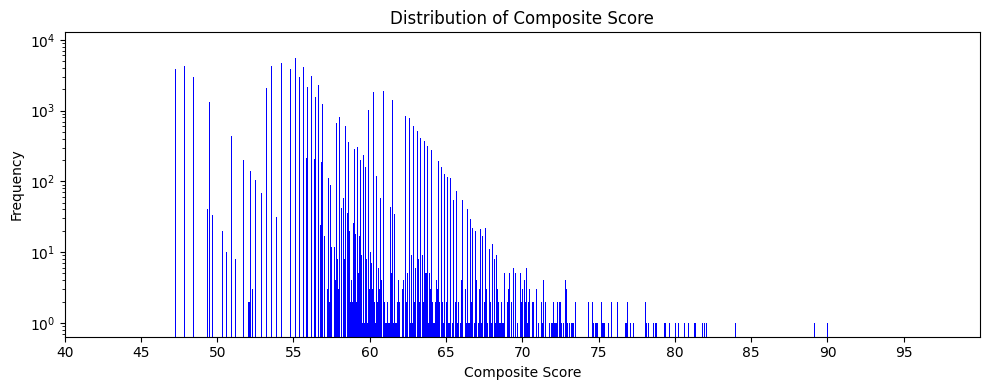

In [63]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Plot the NES histogram
axs.hist(df["cscore"], color='blue', bins=1000)
axs.set_xlabel("Composite Score")
axs.set_ylabel("Frequency")
axs.set_title("Distribution of Composite Score")

axs.set_xticks(np.arange(0,100,5))
axs.set_xlim(40, 100)
    
# Set y-axis scale to logarithmic
axs.set_yscale('log')

# Display the plots and close the figure
plt.tight_layout()
plt.savefig(Path("figures/cscore.png"), dpi=150, facecolor='w', bbox_inches='tight')
plt.show()
plt.close()

In [64]:
df.query("cscore < 50").sort_values('cscore', ascending=False).head(20)

,sequence,input_count,rep1_count,rep2_count,score,OHE,COHE,cscore
18669,CKGGRAAGC,2,1,19,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.074207,49.999999
18798,CGVVRIGRC,2,1,19,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.074043,49.999982
16319,CGRLGELRC,2,19,1,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073917,49.999970
63653,CGGMSRQGC,3,29,1,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073818,49.999960
16570,CREGGVTRC,2,19,1,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073790,49.999957
19029,CLGDGAGTC,2,1,19,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073607,49.999939
16347,CRREVGLRC,2,19,1,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073602,49.999938
18509,CRHMGVGGC,2,1,19,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073601,49.999938
19093,CGILSGRVC,2,1,19,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073561,49.999934
19290,CSRLGSRDC,2,1,19,55.547309,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073552,49.999933


In [65]:
df.query("(cscore >= 50) & (cscore <= 65)").sort_values('cscore', ascending=False).head(20)

,sequence,input_count,rep1_count,rep2_count,score,OHE,COHE,cscore
219,CGNAWATQC,2,61,34,72.214257,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068357,64.999667
206,CMNHINAVC,2,43,52,72.214257,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065523,64.999383
1199,CSNSLWEDC,6,156,127,72.138928,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068986,64.931934
1421,CDNTVYADC,7,149,181,72.133527,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.067097,64.926884
4986,CSVWSGSGC,1,20,27,72.101063,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.075055,64.898463
5932,CGTSRGGQC,1,17,30,72.101063,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.075023,64.898459
4546,CSGQSYGGC,1,25,22,72.101063,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.074521,64.898409
7253,CVVGVERGC,1,32,15,72.101063,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.074166,64.898374
4495,CGGMVNGRC,1,23,24,72.101063,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073977,64.898355
9680,CSGGWGRHC,1,13,34,72.101063,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.073957,64.898353


In [66]:
df.query("cscore > 65").sort_values('cscore', ascending=False).head(20)

,sequence,input_count,rep1_count,rep2_count,score,OHE,COHE,cscore
2,CCNDVNCQC,1,359,279,100.000000,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065189,90.006519
3,CCNGVWCEC,1,307,277,99.054016,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.067739,89.155388
0,CDNRVESEC,2,361,330,93.439248,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.069404,84.102264
1,CGNNVWDLC,2,321,360,93.283318,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068448,83.961831
16,CNEILPVDC,1,184,153,93.172798,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065929,83.862111
20,CHPNSLEVC,1,180,139,92.585638,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.067580,83.333832
24,CGNSVYETC,1,172,136,92.210278,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.070072,82.996258
21,CCNMIECSC,17,2542,2441,91.680518,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.065502,82.519017
25,CGNEIWSEC,60,8466,8320,91.181860,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.068312,82.070505
22,CTNDIFGGC,9,1351,1131,91.028250,[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.069428,81.932368


In [68]:
df.to_csv("df_cscore_100000.csv")